## Answer 1.
For any processor the GFLOPS of the processor can be calculated in the following way

GFLOPS = Number of Cores $\times$ Clock Speed (GHz) $\times$ FLOP per Cycle per Core

Now, the Intel Xeon 8168 Processor has
* Number of Cores ${}^{[1]}$ = 24
* Maximum Clock Speed ${}^{[1]}$ = 3.7 GHz
* 2 AVX-512 FMA Units ${}^{[1]}$

For Double Precision floating point operations, the number of FLOP per Cycle per Core is 32 ${}^{[2]}$

$\therefore$ GFLOPS = 24 $\times$ 3.7 $\times$ 32 = 2841.6

This is the theoretical maximum, However in reality the actual GFLOPS is 1459.2 ${}^{[3]}$ due to limiting factors like heat and suboptimal utilization of th1 AVX-512 units.

Thus for a peak performance of 100 TeraFlops,

number of processors required (Theoretically) = $\dfrac{100}{2.8416} = 35.2 \approx 36$

number of processors required (Practically) = $\dfrac{100}{1.4592} = 68.53 \approx 69$

References:
1. https://en.wikichip.org/wiki/intel/xeon_platinum/8168
2. https://www.intel.com/content/www/us/en/architecture-and-technology/avx-512-overview.html#:~:text=Enhanced%20Vector%20Processing%20Capabilities.%20With%20ultra%2Dwide%20512%2Dbit,Intel%C2%AE%20Advanced%20Vector%20Extensions%202%20(Intel%C2%AE%20AVX2).
3. https://www.intel.com/content/dam/support/us/en/documents/processors/APP-for-Intel-Xeon-Processors.pdf

## Answer 2.

No the given code will not properly work due to the following problems:-
* b = a*13 just appends the array 'a' 13 times
* b[i] will throw an array index out of bounds exception for an array 'b' of length 10 when ''i goes from 1 to 10 as array indexes are numbered from 0-9

The corrected code is:

In [4]:
a = [i for i in range(1,11)]
b = [i*13 for i in a]
for i in range(1,11):
    print (i, "x 13", "=", b[i-1])

1 x 13 = 13
2 x 13 = 26
3 x 13 = 39
4 x 13 = 52
5 x 13 = 65
6 x 13 = 78
7 x 13 = 91
8 x 13 = 104
9 x 13 = 117
10 x 13 = 130


## Answer 3.

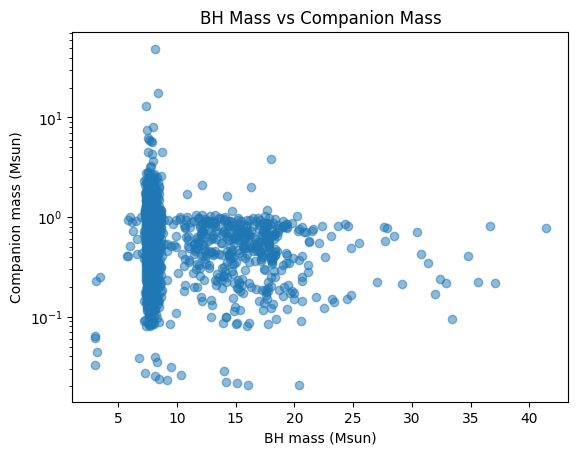

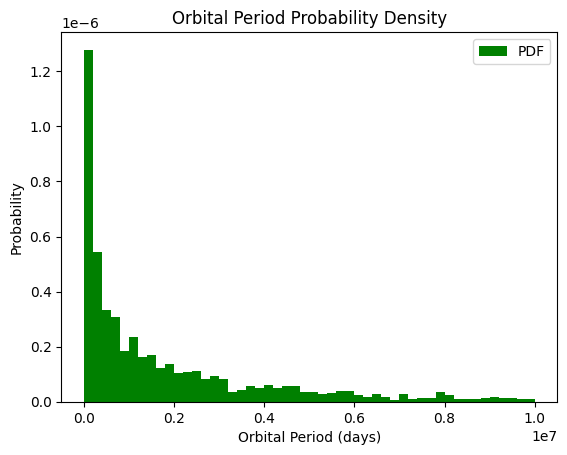

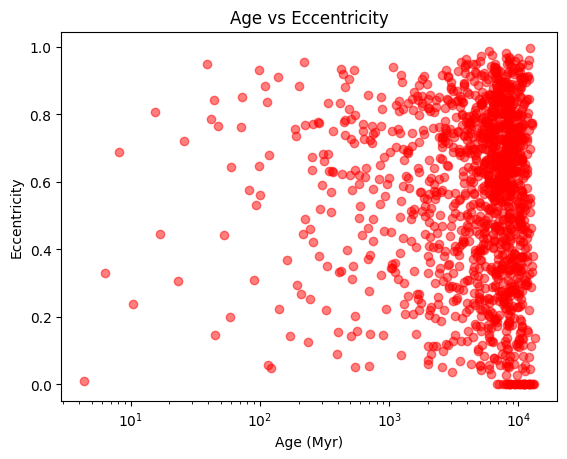

In [34]:
import matplotlib.pyplot as plt

with open("HW1_data.txt") as f:
    data = f.read().split("\n")
    headers, orbPeriod, ecc, BHMass, compMass, age = [], [], [], [], [], []
    headers = data[0].split(",")
    for lineNo in range(1,len(data)):
        variables = orbPeriod, ecc, BHMass, compMass, age
        if(len(data[lineNo])>0):
            values = data[lineNo].split(",")
            [arr.append(float(values[i])) for i, arr in enumerate(variables)]


## BH mass vs Companion Mass Scatter Plot
plt.scatter(BHMass, compMass, alpha=0.5)
plt.title("BH Mass vs Companion Mass")
plt.xlabel(headers[2])
plt.ylabel(headers[3])
plt.yscale("log")
plt.show()

## Orbital Period PDF
plt.hist(orbPeriod, 50,  (0, 1e7), density=True, color="Green", label="PDF")
plt.title("Orbital Period Probability Density")
plt.xlabel(headers[0])
plt.ylabel("Probability")
plt.legend()
plt.show()

## Age and eccentricity scatter plot
plt.scatter(age, ecc, alpha=0.5, color="Red")
plt.title("Age vs Eccentricity")
plt.xlabel(headers[4])
plt.ylabel(headers[1])
plt.xscale("log")
plt.show()

## Answer 4.

In [107]:
## Decimal Integer to Binary
decimal = int(input("Enter a decimal integer: "))
binary = ""
if(decimal==0):
    print(0)
else:
    while(decimal!=0):
        bit = decimal%2
        binary = str(bit) + binary 
        decimal = decimal//2
    print(binary)

Enter a decimal integer:  12


1100


In [103]:
## Real Decimal to Binary
decimal = float(input("Enter a real decimal: "))

if decimal == 0.0:
    s = 0 if decimal >= 0 else 1
    IEEE = f"{s} {'0'*11} {'0'*52}"
elif decimal == float('inf'):
    s = 0
    IEEE = f"{s} {'1'*11} {'0'*52}"
elif decimal == float('-inf'):
    s = 1
    IEEE = f"{s} {'1'*11} {'0'*52}"
elif str(decimal).lower() == 'nan':
    s = 0
    IEEE = f"{s} {'1'*11} {'1'*52}"
else:      
    s = 0 if decimal >= 0 else 1
    decimal = abs(decimal)
    
    integ = int(decimal)
    frac = decimal - integ
    
    WBinary = ""
    if integ == 0:
        WBinary = "0"
    else:
        n = integ
        while n != 0:
            bit = n%2
            WBinary = str(bit) + WBinary
            n = n//2
    
    FBinary = ""
    while len(FBinary) < 52:
        frac *= 2
        if frac >= 1:
            FBinary += "1"
            frac -= 1
        else:
            FBinary += "0"
    
    if WBinary != "0":
        e = len(WBinary) - 1
        mantissa = WBinary[1:] + FBinary
    else:
        marker = FBinary.find("1")
        exponent = -1 - marker
        mantissa = FBinary[marker + 1:]
    
    e += 1023
    eStr = f"{e:011b}"
    
    mantissa = mantissa[:52]
    
    IEEE = f"{s}{eStr}{mantissa}"
    
print("The number in IEEE754 representation is:")
print(f"s = {s}")
print(f"e = {eStr}")
print(f"f = {mantissa}")
print("IEEE = " + IEEE)

Enter a real decimal:  0.1e204


The number in IEEE754 representation is:
s = 0
e = 11010100001
f = 0100011010011010111001000010110010000101011000001100
IEEE = 0110101000010100011010011010111001000010110010000101011000001100
False


In [104]:
## Floating point to decimal
ieee = input("Enter the IEEE754 double-precision binary string (64 bits): ").strip()
if len(ieee) != 64:
    print("The IEEE754 binary string must be 64 bits long.")
else:
    decimal = 0
    
    s = int(ieee[0]) 
    e = int(ieee[1:12], 2) 
    f = ieee[12:]
    
    exponent = e - 1023

    mantissa = 1.0 
    for i, bit in enumerate(f):
        if bit == '1':
            mantissa += 2 ** -(i + 1)

    if e == 0:
        if f == '0' * 52:
            if s == 0:
                decimal = 0.0
            else:
                decimal = -0.0
        else:
            exponent = -1022
            mantissa = 0.0
            for i, bit in enumerate(f):
                if bit == '1':
                    mantissa += 2 ** -(i + 1)
    elif e == 2047:
        if f == '0' * 52:
            if s == 0:
                decimal = float('inf') 
            else:
                decimal = float('-inf') 
        else:
            decimal = float('nan')
            
    decimal = (-1)**s*mantissa * (2 ** exponent)
    print(f"The decimal equivalent is: {decimal}")

Enter the IEEE754 double-precision binary string (64 bits):  0110101000010100011010011010111001000010110010000101011000001100


The decimal equivalent is: 1e+203


## Answer 5.

1 ) Double Precision uses 64 bits, 1b for s, 11b for e and 52b for f.
$\therefore$ for s = 0, e = 0, and f = 0.0000 0000 0000 0000 0000 0000 0000 0000 0000 0000 0000 0000 0001 = $2^{-52}$ we have the smallest possible non zero positive number as

$N_{min} = (-1)^{0}\cdot 2^{-52} \cdot 2^{-1022} = 2^{-1074} = 5 \times 10^{-324}$


2 ) In IEEE754 format:
* s = 0
* e = 0
* f = 0.0000 0000 0000 0000 0000 0000 0000 0000 0000 0000 0000 0000 0001

$\therefore N_{min} = (-1)^{s}\cdot 0.f \cdot 2^{-1022}$

## Answer 6.

In [4]:
## 6.1
def factorial(n): 
    fact = 1
    for i in range (1,(n+1)):
        fact = fact * i
    return fact

#n = int(input("Enter a positive integer: "))
#print(f"The Factorial of the number is {factorial(n)}")

Enter a positive integer:  5


The Factorial of the number is 120


In [16]:
## 6.2
def exp_brute(x):
    ans = 1
    diff = 1
    n = 1
    while(diff>0):
        prev_ans = ans 
        term = (x**n)/factorial(n)
        ans = ans + term
        diff = ans - prev_ans
        n = n + 1
    return ans

print(exp_brute(1))

2.7182818284590455


In [17]:
## 6.3
import time
for x in [0.1,20]:
    start_time = time.time()
    result = exp_brute(x)
    end_time = time.time()
    
    t_diff = end_time - start_time
    print(f"Time taken for e^{x} = {t_diff}")

Time taken for e^0.1 = 3.814697265625e-05
Time taken for e^20 = 0.0003936290740966797


In [46]:
## 6.4
def exp_rec(x):
    ans = 1
    term = 1
    diff = 1
    n = 1
    terms = []
    cumulative = []
    while(abs(diff)>0):
        prev_ans = ans
        cumulative.append(ans)
        term = term * (x/n)
        terms.append(term)
        ans = ans + term
        diff = ans - prev_ans
        n = n + 1
    return ans, terms, cumulative

result, terms, cumulative  = exp_rec(1)
print(f"Result: {result}")
print(f"Series Terms: {terms}")
print(f"Cumulative Series: {cumulative}")

Result: 2.7182818284590455
Series Terms: [1.0, 0.5, 0.16666666666666666, 0.041666666666666664, 0.008333333333333333, 0.0013888888888888887, 0.00019841269841269839, 2.4801587301587298e-05, 2.7557319223985884e-06, 2.7557319223985883e-07, 2.5052108385441714e-08, 2.087675698786809e-09, 1.605904383682161e-10, 1.1470745597729721e-11, 7.647163731819814e-13, 4.779477332387384e-14, 2.81145725434552e-15, 1.561920696858622e-16]
Cumulative Series: [1, 2.0, 2.5, 2.6666666666666665, 2.708333333333333, 2.7166666666666663, 2.7180555555555554, 2.7182539682539684, 2.71827876984127, 2.7182815255731922, 2.7182818011463845, 2.718281826198493, 2.7182818282861687, 2.7182818284467594, 2.71828182845823, 2.718281828458995, 2.718281828459043, 2.7182818284590455]


In [19]:
## 6.5
import time
for x in [0.1,20]:
    start_time = time.time()
    result = exp_rec(x)
    end_time = time.time()
    
    t_diff = end_time - start_time
    print(f"Time taken for e^{x} = {t_diff}")

Time taken for e^0.1 = 1.1920928955078125e-05
Time taken for e^20 = 2.956390380859375e-05


exp_rec evaluates much faster than exp_brute for larger values of x

In [30]:
## 6.6
import numpy as np
print(f"Numpy exp(0.1): {np.exp(0.1)}")
print(f"Brute Force exp(0.1): {(exp_brute(0.1))}")
print(f"Recursion exp(0.1): {exp_rec(0.1)[0]}")
print("")
print(f"Numpy exp(20): {np.exp(20)}")
print(f"Brute Force exp(20): {exp_brute(20)}")
print(f"Recursion exp(20): {exp_rec(20)[0]}")

Numpy exp(0.1): 1.1051709180756477
Brute Force exp(0.1): 1.1051709180756473
Recursion exp(0.1): 1.1051709180756473

Numpy exp(20): 485165195.4097903
Brute Force exp(20): 485165195.40979016
Recursion exp(20): 485165195.40979046


For both cases we see discrepancy occurs for the 16th digit

Text(0, 0.5, '$X_{N}$')

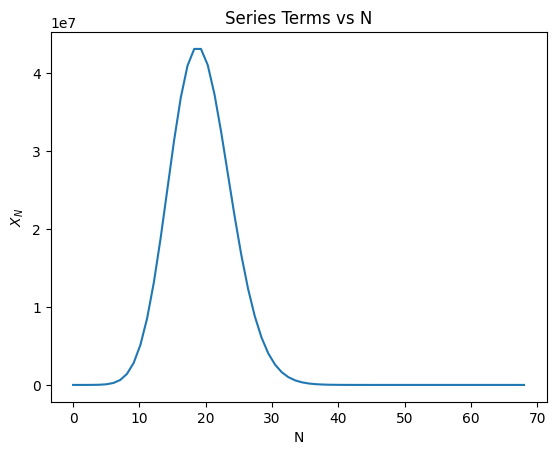

In [39]:
## 6.7
res, terms, _ = exp_rec(20)
nArr = np.linspace(0,len(terms),len(terms))
plt.plot(nArr, terms)
plt.title("Series Terms vs N")
plt.xlabel("N")
plt.ylabel("$X_{N}$")

The turning point is approximately around n=19

In [51]:
## 6.8

print(f"Numpy exp(-20): {np.exp(-20)}")
print(f"Recursion exp(-20): {exp_rec(-20)[0]}")
error = (exp_rec(-20)[0]-np.exp(-20))/np.exp(-20)
print(f"Error: {error}")

Numpy exp(-20): 2.061153622438558e-09
Recursion exp(-20): 6.147561828914626e-09
Accuracy: 1.9825830360191323


If Numpy is assumed to be correct then the recursion function gives a value 198% more than the true value.
This can be understood with the following plot

Text(0, 0.5, '$C_{N}$')

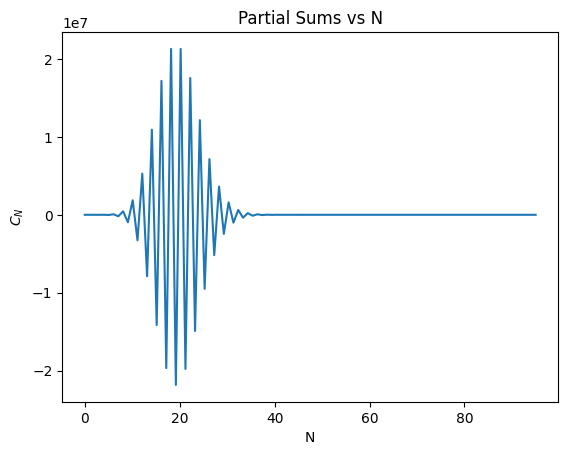

In [58]:
res, _, cumulative = exp_rec(-20)
nArr = np.linspace(0,len(cumulative),len(cumulative))
plt.plot(nArr, cumulative)
plt.title("Partial Sums vs N")
plt.xlabel("N")
plt.ylabel("$C_{N}$")

The partial sums of the series fluctuates a lot between very large values, taking the difference starts to introduce catastrophic cancellation errors, thereby giving us a poor result

In [59]:
## 6.9

res, _, _  = exp_rec(20)
result = 1/res
print(f"Numpy exp(-20): {np.exp(-20)}")
print(f"Recursion exp(-20): {result}")
error = (result-np.exp(-20))/np.exp(-20)
print(f"Error: {error}")

Numpy exp(-20): 2.061153622438558e-09
Recursion exp(-20): 2.061153622438557e-09
Error: -4.013192435284797e-16


Since negative values of exponent brought fluctuations in signs of partial sums, a better way to use the function would be to make use of the fact

$e^{-x} = \dfrac{1}{e^x}$

Doing this gives us a much better result with a very low error